In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
# one-hot encode

def one_hot_encode(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
import numpy as np
x_train = one_hot_encode(train_data)
x_test = one_hot_encode(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                160016    
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NumEpochs = 20
BatchSize = 512

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 87ms/step - loss: 0.4756 - acc: 0.8086 - val_loss: 0.3292 - val_acc: 0.8782
Epoch 2/20
49/49 [==============================] - 3s 68ms/step - loss: 0.2433 - acc: 0.9121 - val_loss: 0.2813 - val_acc: 0.8880
Epoch 3/20
49/49 [==============================] - 3s 56ms/step - loss: 0.1782 - acc: 0.9390 - val_loss: 0.2907 - val_acc: 0.8854
Epoch 4/20
49/49 [==============================] - 2s 43ms/step - loss: 0.1416 - acc: 0.9524 - val_loss: 0.3163 - val_acc: 0.8789
Epoch 5/20
49/49 [==============================] - 2s 43ms/step - loss: 0.1152 - acc: 0.9628 - val_loss: 0.3513 - val_acc: 0.8731
Epoch 6/20
49/49 [==============================] - 3s 56ms/step - loss: 0.0924 - acc: 0.9717 - val_loss: 0.3841 - val_acc: 0.8694
Epoch 7/20
49/49 [==============================] - 3s 53ms/step - loss: 0.0739 - acc: 0.9792 - val_loss: 0.4371 - val_acc: 0.8624
Epoch 8/20
49/49 [==============================] - 2s 43ms/step - loss: 0.0590 - a

In [ ]:
results = model.evaluate(x_test, y_test)
print("results ", results[1])

782/782 [==============================] - 2s 3ms/step - loss: 0.9410 - acc: 0.8535
results  0.8534799814224243


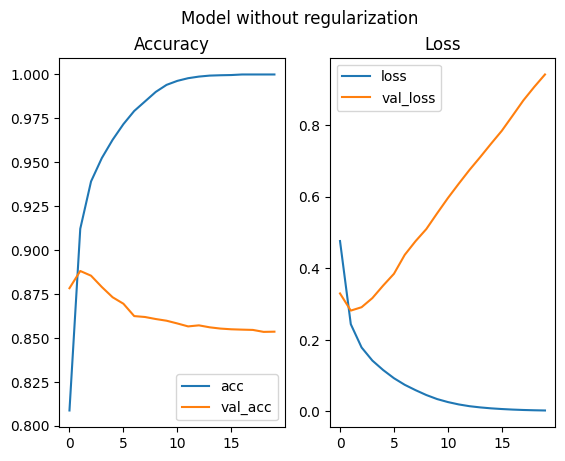

In [ ]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2)

axis[0].plot(range(len(history.history['acc'])), history.history['acc'], label='acc')
axis[0].plot(range(len(history.history['val_acc'])), history.history['val_acc'], label='val_acc')
axis[0].set_title("Accuracy")
axis[0].legend()

axis[1].plot(range(len(history.history['loss'])), history.history['loss'], label='loss')
axis[1].plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='val_loss')
axis[1].set_title("Loss")
axis[1].legend()

figure.suptitle("Model without regularization")
plt.show()

In [ ]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.L1(l1=0.01)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.L1(l1=0.01)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                160016    
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NumEpochs = 20
BatchSize = 512

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 88ms/step - loss: 5.5745 - acc: 0.5576 - val_loss: 1.5521 - val_acc: 0.5340
Epoch 2/20
49/49 [==============================] - 2s 42ms/step - loss: 1.3414 - acc: 0.6117 - val_loss: 1.2347 - val_acc: 0.7020
Epoch 3/20
49/49 [==============================] - 2s 43ms/step - loss: 1.1864 - acc: 0.6832 - val_loss: 1.1376 - val_acc: 0.6846
Epoch 4/20
49/49 [==============================] - 2s 43ms/step - loss: 1.0972 - acc: 0.6997 - val_loss: 1.0532 - val_acc: 0.7057
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 1.0148 - acc: 0.7222 - val_loss: 0.9723 - val_acc: 0.7342
Epoch 6/20
49/49 [==============================] - 3s 56ms/step - loss: 0.9337 - acc: 0.7538 - val_loss: 0.8970 - val_acc: 0.7675
Epoch 7/20
49/49 [==============================] - 3s 54ms/step - loss: 0.8580 - acc: 0.7802 - val_loss: 0.8262 - val_acc: 0.7872
Epoch 8/20
49/49 [==============================] - 2s 42ms/step - loss: 0.7995 - a

In [ ]:
results = model.evaluate(x_test, y_test)
print("results ", results[1])

782/782 [==============================] - 3s 3ms/step - loss: 0.6964 - acc: 0.8549
results  0.8548799753189087


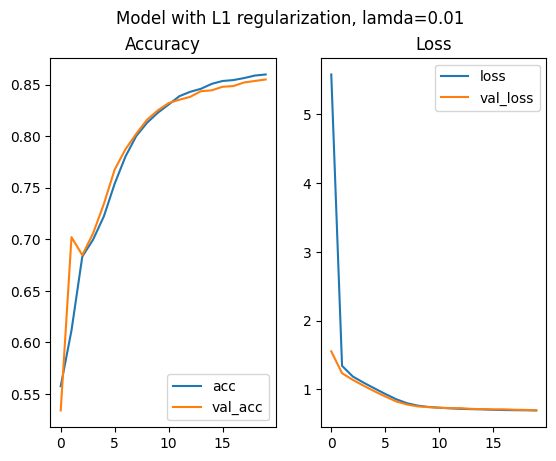

In [ ]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2)

axis[0].plot(range(len(history.history['acc'])), history.history['acc'], label='acc')
axis[0].plot(range(len(history.history['val_acc'])), history.history['val_acc'], label='val_acc')
axis[0].set_title("Accuracy")
axis[0].legend()

axis[1].plot(range(len(history.history['loss'])), history.history['loss'], label='loss')
axis[1].plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='val_loss')
axis[1].set_title("Loss")
axis[1].legend()

figure.suptitle("Model with L1 regularization, lamda=0.01")
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.L2(l2=0.5)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.L2(l2=0.5)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                160016    
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NumEpochs = 20
BatchSize = 512

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 9s 168ms/step - loss: 10.0774 - acc: 0.5916 - val_loss: 6.5739 - val_acc: 0.6278
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 5.6194 - acc: 0.7168 - val_loss: 4.7537 - val_acc: 0.7482
Epoch 3/20
49/49 [==============================] - 2s 42ms/step - loss: 4.0968 - acc: 0.7536 - val_loss: 3.4813 - val_acc: 0.7823
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 3.0140 - acc: 0.7798 - val_loss: 2.5789 - val_acc: 0.7744
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 2.2514 - acc: 0.7731 - val_loss: 1.9483 - val_acc: 0.7644
Epoch 6/20
49/49 [==============================] - 3s 56ms/step - loss: 1.7224 - acc: 0.7464 - val_loss: 1.5146 - val_acc: 0.7298
Epoch 7/20
49/49 [==============================] - 3s 52ms/step - loss: 1.3606 - acc: 0.7452 - val_loss: 1.2207 - val_acc: 0.6810
Epoch 8/20
49/49 [==============================] - 2s 41ms/step - loss: 1.1184 -

In [ ]:
results = model.evaluate(x_test, y_test)
print("results ", results[1])

782/782 [==============================] - 2s 3ms/step - loss: 0.6934 - acc: 0.5000
results  0.5


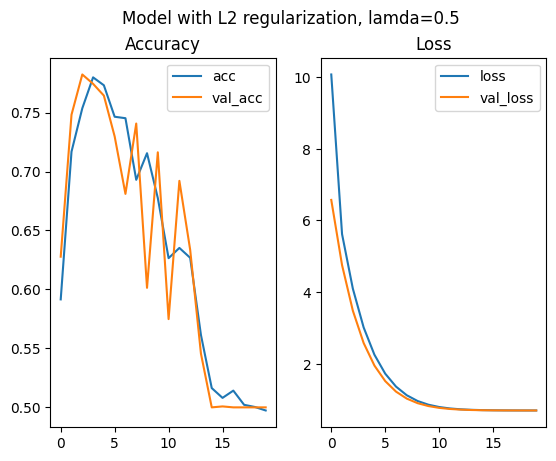

In [ ]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2)

axis[0].plot(range(len(history.history['acc'])), history.history['acc'], label='acc')
axis[0].plot(range(len(history.history['val_acc'])), history.history['val_acc'], label='val_acc')
axis[0].set_title("Accuracy")
axis[0].legend()

axis[1].plot(range(len(history.history['loss'])), history.history['loss'], label='loss')
axis[1].plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='val_loss')
axis[1].set_title("Loss")
axis[1].legend()

figure.suptitle("Model with L2 regularization, lamda=0.5")
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.L1L2(l1=0.1, l2=0.1)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.L1L2(l1=0.1, l2=0.1)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 16)                160016    
                                                                 
 dense_23 (Dense)            (None, 16)                272       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NumEpochs = 20
BatchSize = 512

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 110ms/step - loss: 51.5636 - acc: 0.5291 - val_loss: 10.6200 - val_acc: 0.5832
Epoch 2/20
49/49 [==============================] - 3s 59ms/step - loss: 8.3451 - acc: 0.5255 - val_loss: 7.1087 - val_acc: 0.5000
Epoch 3/20
49/49 [==============================] - 2s 43ms/step - loss: 6.4812 - acc: 0.5134 - val_loss: 5.8578 - val_acc: 0.5000
Epoch 4/20
49/49 [==============================] - 2s 42ms/step - loss: 5.3707 - acc: 0.5201 - val_loss: 4.8660 - val_acc: 0.5513
Epoch 5/20
49/49 [==============================] - 2s 51ms/step - loss: 4.4731 - acc: 0.5080 - val_loss: 4.0806 - val_acc: 0.5000
Epoch 6/20
49/49 [==============================] - 3s 54ms/step - loss: 3.7810 - acc: 0.5000 - val_loss: 3.5218 - val_acc: 0.5000
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 3.2688 - acc: 0.5026 - val_loss: 3.0850 - val_acc: 0.5000
Epoch 8/20
49/49 [==============================] - 2s 45ms/step - loss: 2.9072 

In [ ]:
results = model.evaluate(x_test, y_test)
print("results ", results[1])

782/782 [==============================] - 2s 3ms/step - loss: 2.4744 - acc: 0.5000
results  0.5


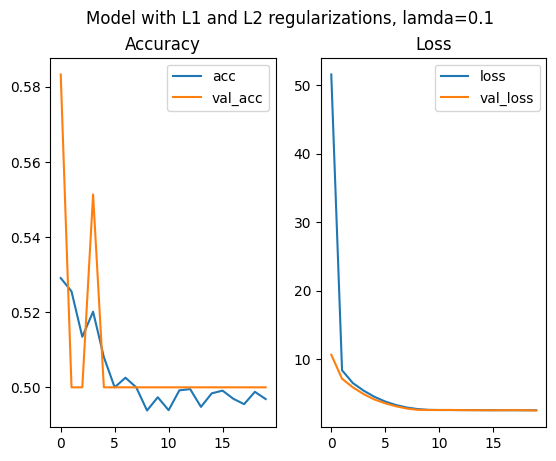

In [ ]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2)

axis[0].plot(range(len(history.history['acc'])), history.history['acc'], label='acc')
axis[0].plot(range(len(history.history['val_acc'])), history.history['val_acc'], label='val_acc')
axis[0].set_title("Accuracy")
axis[0].legend()

axis[1].plot(range(len(history.history['loss'])), history.history['loss'], label='loss')
axis[1].plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='val_loss')
axis[1].set_title("Loss")
axis[1].legend()

figure.suptitle("Model with L1 and L2 regularizations, lamda=0.1")
plt.show()